In [60]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [14]:
#Initial inspection


df = pd.read_csv("gutendex-5000-books.csv")

print(df.shape)
print(df.info())
print(df.head())

(5000, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   id                                      5000 non-null   int64 
 1   title                                   5000 non-null   object
 2   authors                                 5000 non-null   object
 3   summaries                               5000 non-null   object
 4   editors                                 5000 non-null   object
 5   translators                             5000 non-null   object
 6   subjects                                5000 non-null   object
 7   bookshelves                             5000 non-null   object
 8   languages                               5000 non-null   object
 9   copyright                               5000 non-null   bool  
 10  media_type                              5000 non-null   objec

In [15]:
#NaN value review for columns

nan_count = df.isna().sum()
nan_percent = (df.isna().sum() / len(df)) * 100

nan_summary = pd.DataFrame({
    "NaN_Count": nan_count,
    "NaN_Percentage": nan_percent
})

print(nan_summary.sort_values(by="NaN_Percentage", ascending=False))


                                        NaN_Count  NaN_Percentage
formats.video/mpeg                           4999           99.98
formats.video/x-flv                          4999           99.98
formats.text/xml                             4999           99.98
formats.application/x-musescore              4999           99.98
formats.image/png                            4998           99.96
formats.image/gif                            4997           99.94
formats.text/rtf                             4997           99.94
formats.audio/midi                           4996           99.92
formats.text/plain                           4986           99.72
formats.application/msword                   4985           99.70
formats.application/prs.tex                  4984           99.68
formats.text/x-rst                           4975           99.50
formats.text/plain; charset=iso-8859-1       4964           99.28
formats.text/html; charset=iso-8859-1        4953           99.06
formats.te

In [16]:
#Missing values in tuple

df['missing_per_row'] = df.isna().sum(axis=1)

print(df['missing_per_row'].describe())
print(df[df['missing_per_row'] > 3])

count    5000.000000
mean       21.497800
std         0.658849
min        18.000000
25%        21.000000
50%        22.000000
75%        22.000000
max        25.000000
Name: missing_per_row, dtype: float64
         id                                              title  \
0        84            Frankenstein; Or, The Modern Prometheus   
1      2701                           Moby Dick; Or, The Whale   
2      1342                                Pride and Prejudice   
3      1513                                   Romeo and Juliet   
4       100          The Complete Works of William Shakespeare   
...     ...                                                ...   
4995   7467  The Newcomes: Memoirs of a Most Respectable Fa...   
4996  12784  The Prose Works of Jonathan Swift, D.D. — Volu...   
4997  15265            The Quest of the Silver Fleece: A Novel   
4998  19778                    Alice's Abenteuer im Wunderland   
4999  20662  The measurement of intelligence : $b an explan...   

 

In [17]:
#Descriptive Statistics

print(df.describe())

                 id  download_count  missing_per_row
count   5000.000000     5000.000000      5000.000000
mean   31707.086800     2936.367200        21.497800
std    22551.154032     4954.560829         0.658849
min        1.000000     1154.000000        18.000000
25%    12647.000000     1367.000000        21.000000
50%    28285.000000     1779.000000        22.000000
75%    48033.250000     2732.750000        22.000000
max    77871.000000   135937.000000        25.000000


In [18]:
#Outliers

numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    print(f"{col} - Outliers:", len(outliers))



id - Outliers: 0
download_count - Outliers: 504
missing_per_row - Outliers: 60


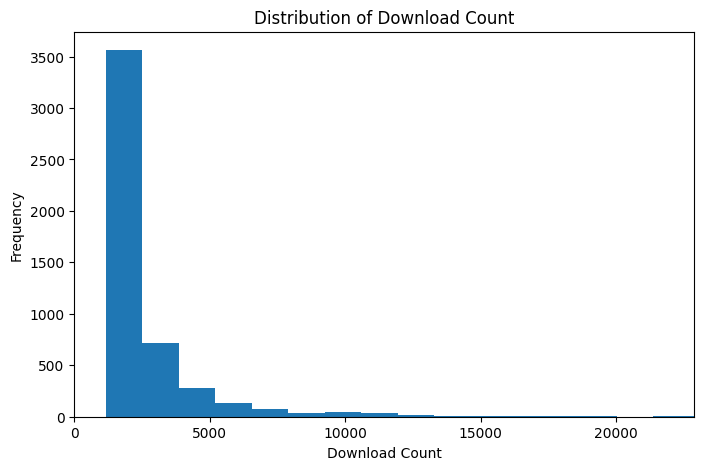

Mode: 1241
Skewness: 11.318523322547387


In [32]:
#Plot for outliers to observe right skewness

plt.figure(figsize=(8,5))
plt.hist(df['download_count'], bins=100)
plt.xlabel("Download Count")
plt.ylabel("Frequency")
plt.title("Distribution of Download Count")
plt.xlim(0, df['download_count'].quantile(0.99))
plt.show()
print("Mode:", df['download_count'].mode()[0])
print("Skewness:", df['download_count'].skew())


In [23]:
#Data cleaning by dropping useless columns

raw_df=pd.read_csv("gutendex-5000-books.csv")
df=raw_df.copy()

nan_percent = (df.isna().sum() / len(df)) * 100
cols_to_drop = nan_percent[nan_percent > 95].index
df = df.drop(columns=cols_to_drop)

print(df.shape)

(5000, 20)


In [30]:
#Recheck of missing columns

nan_count = df.isna().sum()
nan_percent = (df.isna().sum() / len(df)) * 100

nan_summary = pd.DataFrame({
    "NaN_Count": nan_count,
    "NaN_Percentage": nan_percent
})

print(nan_summary.sort_values(by="NaN_Percentage", ascending=False))

                                        NaN_Count  NaN_Percentage
formats.text/plain; charset=utf-8            2829           56.58
formats.text/plain; charset=us-ascii          288            5.76
formats.application/x-mobipocket-ebook        136            2.72
formats.application/epub+zip                  136            2.72
formats.application/octet-stream               78            1.56
formats.text/html                              14            0.28
editors                                         0            0.00
authors                                         0            0.00
title                                           0            0.00
id                                              0            0.00
summaries                                       0            0.00
bookshelves                                     0            0.00
translators                                     0            0.00
download_count                                  0            0.00
media_type

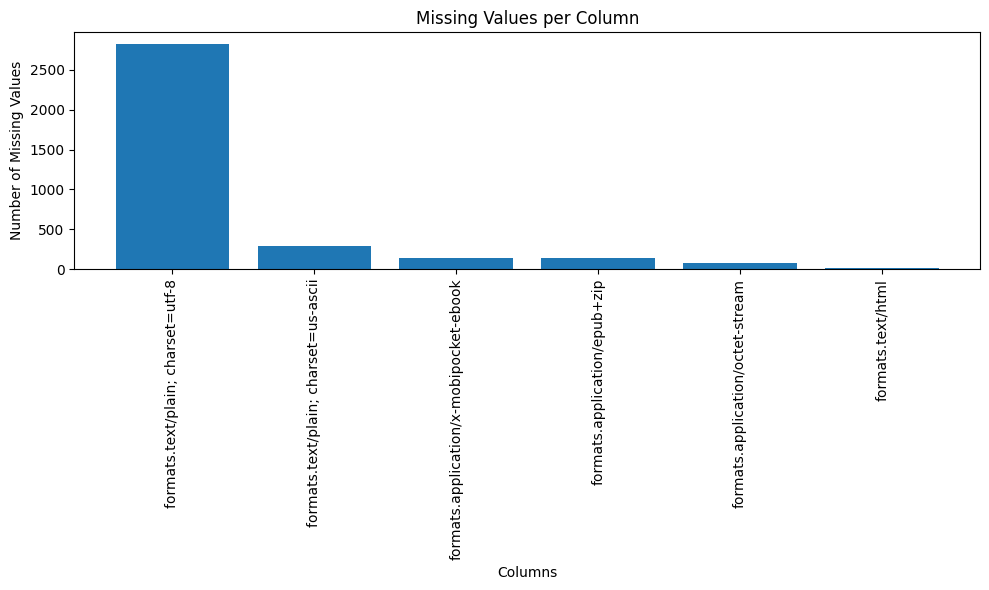

In [33]:
#Visualizing missing column values

missing_counts = df.isna().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(missing_counts.index, missing_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column")
plt.tight_layout()
plt.show()


In [29]:
#Recheck of missing values

df['missing_per_row'] = df.isna().sum(axis=1)

print(df['missing_per_row'].describe())
print(df[df['missing_per_row'] > 0])

count    5000.000000
mean        0.696200
std         0.715827
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: missing_per_row, dtype: float64
         id                                              title  \
9      2554                               Crime and Punishment   
10    37106           Little Women; Or, Meg, Jo, Beth, and Amy   
17      394                                           Cranford   
21     4085                  The Adventures of Roderick Random   
22     6593                  History of Tom Jones, a Foundling   
...     ...                                                ...   
4991  34506                                     German Fiction   
4992  40410  Dickens and His Illustrators: Cruikshank, Seym...   
4993  48776  Petrarch, the First Modern Scholar and Man of ...   
4998  19778                    Alice's Abenteuer im Wunderland   
4999  20662  The measurement of intelligence : $b an explan...   

 

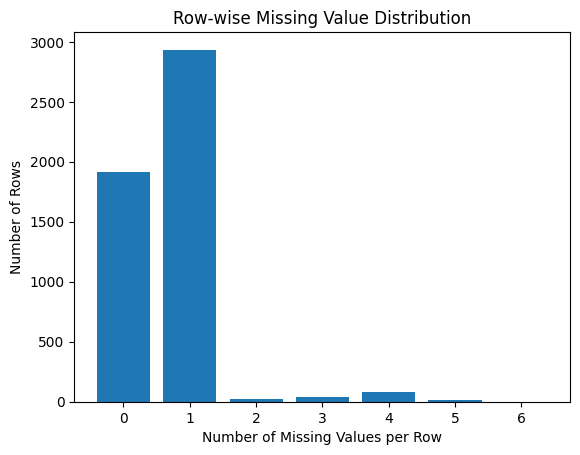

In [28]:
#Visualising missing row values

missing_per_row = df.isna().sum(axis=1)
missing_counts = missing_per_row.value_counts().sort_index()

plt.bar(missing_counts.index, missing_counts.values)
plt.xlabel("Number of Missing Values per Row")
plt.ylabel("Number of Rows")
plt.title("Row-wise Missing Value Distribution")
plt.show()

In [42]:
format_cols = [col for col in df.columns if col.startswith("formats.")]
format_cols.extend(['missing_per_row'])

df = df.drop(columns=format_cols, errors='ignore')

df = df.reset_index(drop=True)

print("New dataset shape:", df.shape)

df.to_csv("cleaned_dataset_v1.csv", index=False)


New dataset shape: (5000, 12)


In [43]:
#Missing values for object datatype

object_cols = df.select_dtypes(include='object').columns

empty_counts = {}

for col in object_cols:
    empty_count = (df[col] == "[]").sum()
    if empty_count > 0:
        print(col, ":", empty_count, "(", round((empty_count/len(df))*100,2), "% )")

authors : 342 ( 6.84 % )
summaries : 266 ( 5.32 % )
editors : 4333 ( 86.66 % )
translators : 4295 ( 85.9 % )
subjects : 11 ( 0.22 % )
bookshelves : 215 ( 4.3 % )


In [47]:
import numpy as np

copyright_encoded = df['copyright'].astype(int)
print("Copyright variance:", np.var(copyright_encoded))

media_encoded = df['media_type'].astype('category').cat.codes
print("Media_type variance:", np.var(media_encoded))

print(df['copyright'].value_counts(normalize=True))
print(df['media_type'].value_counts(normalize=True))


Copyright variance: 0.00931164
Media_type variance: 0.09387675999999999
copyright
False    0.9906
True     0.0094
Name: proportion, dtype: float64
media_type
Text          0.9758
Sound         0.0240
StillImage    0.0002
Name: proportion, dtype: float64


In [ ]:
df=df.drop(columns=['editors','translators','copyright','media_type','copyright_encoded','media_type_encoded'])


(5000, 8)


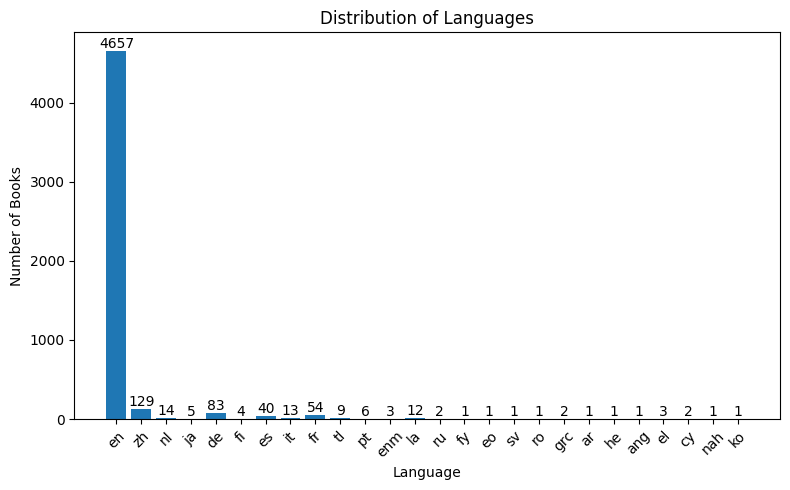

In [61]:
all_languages = []

for entry in df['languages']:
    entry = str(entry).strip("[]")
    items = entry.split(',')
    for item in items:
        cleaned = item.strip().strip("'").strip('"')
        if cleaned != "":
            all_languages.append(cleaned)

language_counts = Counter(all_languages)

labels = list(language_counts.keys())
values = list(language_counts.values())

plt.figure(figsize=(8,5))
plt.bar(labels, values)
plt.xticks(rotation=45)
plt.xlabel("Language")
plt.ylabel("Number of Books")
plt.title("Distribution of Languages")
for i in range(len(labels)):
    plt.text(i, values[i], str(values[i]), ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [ ]:
df = df[df['languages'].str.contains("'en'")]
df = df.reset_index(drop=True)

df = df.drop(columns=['languages'])
df.to_csv("cleaned_dataset_v2.csv")

247


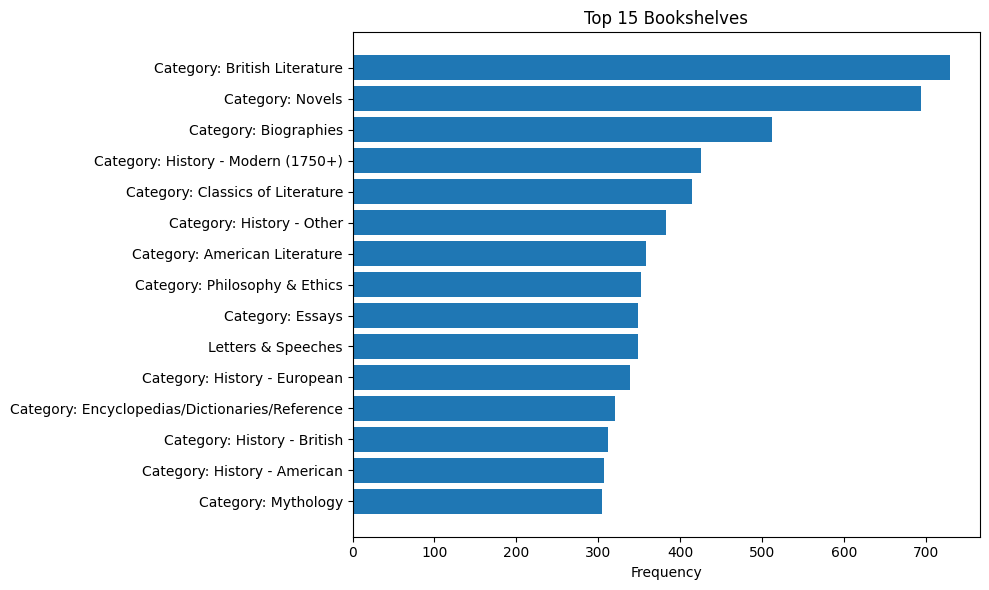

In [83]:
all_shelves = []

for entry in df['bookshelves']:
    entry = str(entry).strip("[]")
    items = entry.split(',')
    for item in items:
        cleaned = item.strip().strip("'").strip('"')
        if cleaned != "":
            all_shelves.append(cleaned)

shelf_counts = Counter(all_shelves)
top_shelves = shelf_counts.most_common(15)

labels = [x[0] for x in top_shelves]
values = [x[1] for x in top_shelves]

plt.figure(figsize=(10,6))
plt.barh(labels[::-1], values[::-1])
plt.xlabel("Frequency")
plt.title("Top 15 Bookshelves")
print(len(shelf_counts))
plt.tight_layout()
plt.show()
